In [1]:
#importações das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import json

In [2]:
#importação das planilhas csv para serem dataframes
df1000 = pd.read_csv("dataset_sudeste_simples_realista_outliers-1K.csv")

In [3]:
df1000.columns.tolist() #listar colunas de tabela de 1000 linhas

['id', 'idade', 'renda', 'cidade', 'categoria', 'nota', 'feedback']

In [4]:
# Tratamento de NaN(nulos) - converter para 0 - tabela de 100 linhas
df1000['idade'] = df1000['idade'].fillna(0)
df1000['renda'] = df1000['renda'].fillna(0)
df1000['cidade'] = df1000['cidade'].fillna(0)
df1000['categoria'] = df1000['categoria'].fillna(0)
df1000['nota'] = df1000['nota'].fillna(0)
df1000['feedback'] = df1000['feedback'].fillna(0)

In [5]:
#feedbackisualização de tabela tratada de 1000 linhas
display(df1000.head(1000))

,id,idade,renda,cidade,categoria,nota,feedback
0,1,25.0,9508.30,Belo Horizonte,A,2.6,Regular
1,2,53.0,2346.15,São Paulo,A,1.6,Ruim
2,3,52.0,7578.47,Vitória,B,7.8,Regular
3,4,52.0,12940.35,São Paulo,B,9.4,Regular
4,5,59.0,4343.05,Vitória,A,3.9,Ruim
...,...,...,...,...,...,...,...
995,996,59.0,12104.07,Rio de Janeiro,A,5.6,Ruim
996,997,31.0,12985.83,Vitória,A,2.5,Ruim
997,998,18.0,2184.16,Vitória,B,0.1,Regular
998,999,18.0,11314.51,Belo Horizonte,B,9.3,Ruim


In [6]:
# Média, mínimo, máximo, quartis, margem de erro, contagem
print("\n### Descrição Estatística 1000###")
print(df1000.describe())


### Descrição Estatística 1000###
                id        idade         renda         nota
count  1000.000000  1000.000000   1000.000000  1000.000000
mean    500.500000    42.954000   7109.053000     4.957500
std     288.819436    17.060039   3842.999966     2.996696
min       1.000000     0.000000      0.000000    -1.400000
25%     250.750000    28.000000   4039.030000     2.300000
50%     500.500000    43.500000   7100.100000     4.900000
75%     750.250000    57.000000  10208.392500     7.400000
max    1000.000000   112.000000  38099.880000    14.700000


In [7]:
# Cálculos Estatísticos de idade
media_idade1000 = sum(df1000['idade'])/len(df1000['idade'])
mediana_idade1000 = df1000['idade'].median()
desvio_padrao_idade1000 = df1000['idade'].std()
maximo_idade1000 = df1000['idade'].max()
minimo_idade1000 = df1000['idade'].min()

print('Média de Idade - 1000 Elementos:',round(media_idade1000,0))
print('Mediana de Idade - 1000 Elementos:',round(mediana_idade1000,0))
print('Desvio Padrão de Idade - 1000 Elementos:',round(desvio_padrao_idade1000,0))
print('Maior Valor de Idade - 1000 Elementos:',round(maximo_idade1000,0))
print('Menor Valor de Idade - 1000 Elementos:',round(minimo_idade1000,0))

Média de Idade - 1000 Elementos: 43.0
Mediana de Idade - 1000 Elementos: 44.0
Desvio Padrão de Idade - 1000 Elementos: 17.0
Maior Valor de Idade - 1000 Elementos: 112.0
Menor Valor de Idade - 1000 Elementos: 0.0


In [8]:
# Cálculos Estatísticos de renda
media_renda1000 = sum(df1000['renda'])/len(df1000['renda'])
mediana_renda1000 = df1000['renda'].median()
desvio_padrao_renda1000 = df1000['renda'].std()
maximo_renda1000 = df1000['renda'].max()
minimo_renda1000 = df1000['renda'].min()

print('Média de Renda - 1000 Elementos:',round(media_renda1000,2))
print('Mediana de Renda - 1000 Elementos:',round(mediana_renda1000,2))
print('Desvio Padrão de Renda - 1000 Elementos:',round(desvio_padrao_renda1000,2))
print('Maior Valor de Renda - 1000 Elementos:',round(maximo_renda1000,2))
print('Menor Valor de Renda - 1000 Elementos:',round(minimo_renda1000,2))

Média de Renda - 1000 Elementos: 7109.05
Mediana de Renda - 1000 Elementos: 7100.1
Desvio Padrão de Renda - 1000 Elementos: 3843.0
Maior Valor de Renda - 1000 Elementos: 38099.88
Menor Valor de Renda - 1000 Elementos: 0.0


In [9]:
# Cálculos Estatísticos de nota
media_nota1000 = sum(df1000['nota'])/len(df1000['nota'])
mediana_nota1000 = df1000['nota'].median()
desvio_padrao_nota1000 = df1000['nota'].std()
maximo_nota1000 = df1000['nota'].max()
minimo_nota1000 = df1000['nota'].min()

print('Média de Nota - 1000 Elementos:',round(media_nota1000,2))
print('Mediana de Nota - 1000 Elementos:',round(mediana_nota1000,2))
print('Desvio Padrão de Nota - 1000 Elementos:',round(desvio_padrao_nota1000,2))
print('Maior Valor de Nota - 1000 Elementos:',round(maximo_nota1000,2))
print('Menor Valor de Nota - 1000 Elementos:',round(minimo_nota1000,2))

Média de Nota - 1000 Elementos: 4.96
Mediana de Nota - 1000 Elementos: 4.9
Desvio Padrão de Nota - 1000 Elementos: 3.0
Maior Valor de Nota - 1000 Elementos: 14.7
Menor Valor de Nota - 1000 Elementos: -1.4


In [10]:
#Calculando o IQR e identificando os limites - Renda
Q1_renda1000 = df1000['renda'].quantile(0.25)
Q3_renda1000 = df1000['renda'].quantile(0.75)
IQR_renda1000 = Q3_renda1000 - Q1_renda1000
limite_inferior_renda1000 = Q1_renda1000 - 1.5 * IQR_renda1000
limite_superior_renda1000 = Q3_renda1000 + 1.5 * IQR_renda1000

print (f"\n\n\t IQR - Campo Renda - 1000\n\n")
print(f"Quartis -> Q1: {Q1_renda1000:-8.2f}  ->  Q3: {Q3_renda1000:-8.2f}")
print(f"IQR ----- {IQR_renda1000}")
print(f"Limites - Inf: {limite_inferior_renda1000:-8.2f}  -> Sup: {limite_superior_renda1000:-8.2f}")



	 IQR - Campo Renda - 1000


Quartis -> Q1:  4039.03  ->  Q3: 10208.39
IQR ----- 6169.362499999999
Limites - Inf: -5215.01  -> Sup: 19462.44


In [11]:
#Calculando o IQR e identificando os limites - Idade
Q1_idade1000 = df1000['idade'].quantile(0.25)
Q3_idade1000 = df1000['idade'].quantile(0.75)
IQR_idade1000 = Q3_idade1000 - Q1_idade1000
limite_inferior_idade1000 = Q1_idade1000 - 1.5 * IQR_idade1000
limite_superior_idade1000 = Q3_idade1000 + 1.5 * IQR_idade1000

print (f"\n\n\t IQR - Campo Idade - 1000\n\n")
print(f"Quartis -> Q1: {Q1_idade1000:-8.2f}  ->  Q3: {Q3_idade1000:-8.2f}")
print(f"IQR ----- {IQR_idade1000}")
print(f"Limites - Inf: {limite_inferior_idade1000:-8.2f}  -> Sup: {limite_superior_idade1000:-8.2f}")



	 IQR - Campo Idade - 1000


Quartis -> Q1:    28.00  ->  Q3:    57.00
IQR ----- 29.0
Limites - Inf:   -15.50  -> Sup:   100.50


In [12]:
#Calculando o IQR e identificando os limites - Nota
Q1_nota1000 = df1000['nota'].quantile(0.25)
Q3_nota1000 = df1000['nota'].quantile(0.75)
IQR_nota1000 = Q3_nota1000 - Q1_nota1000
limite_inferior_nota1000 = Q1_nota1000 - 1.5 * IQR_nota1000
limite_superior_nota1000 = Q3_nota1000 + 1.5 * IQR_nota1000

print (f"\n\n\t IQR - Campo Nota - 1000\n\n")
print(f"Quartis -> Q1: {Q1_nota1000:-8.2f}  ->  Q3: {Q3_nota1000:-8.2f}")
print(f"IQR ----- {IQR_nota1000}")
print(f"Limites - Inf: {limite_inferior_nota1000:-8.2f}  -> Sup: {limite_superior_nota1000:-8.2f}")



	 IQR - Campo Nota - 1000


Quartis -> Q1:     2.30  ->  Q3:     7.40
IQR ----- 5.1000000000000005
Limites - Inf:    -5.35  -> Sup:    15.05


In [13]:
#Outliers Renda
outliers_renda1000 = df1000[(df1000['renda'] < limite_inferior_renda1000) | (df1000['renda'] > limite_superior_renda1000)]
print(f"\n### Possíveis Outliers em 'renda' - 1000 Elementos###\n\n{outliers_renda1000}\n\n\n")


### Possíveis Outliers em 'renda' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
17    18   11.0  32889.27  Rio de Janeiro         B  12.6     Ruim
70    71    3.0  30285.53       São Paulo         B  11.9      Bom
641  642   77.0  38099.88  Rio de Janeiro         A  13.1      Bom





In [14]:
#Outliers Idade
outliers_idade1000 = df1000[(df1000['idade'] < limite_inferior_idade1000) | (df1000['idade'] > limite_superior_idade1000)]
print(f"\n### Possíveis Outliers em 'idade' - 1000 Elementos###\n\n{outliers_idade1000}\n\n\n")


### Possíveis Outliers em 'idade' - 1000 Elementos###

      id  idade     renda          cidade categoria  nota feedback
278  279  112.0    431.21  Belo Horizonte         A  10.9  Regular
324  325  111.0   1141.65  Rio de Janeiro         B  14.7      Bom
363  364  108.0  13441.54  Rio de Janeiro         A  13.1  Regular
384  385  109.0   1039.00       São Paulo         A  11.5     Ruim





In [15]:
#Outliers Nota
outliers_nota1000 = df1000[(df1000['nota'] < limite_inferior_nota1000) | (df1000['nota'] > limite_superior_nota1000)]
print(f"\n### Possíveis Outliers em 'nota' - 1000 Elementos###\n\n{outliers_nota1000}\n\n\n")


### Possíveis Outliers em 'nota' - 1000 Elementos###

Empty DataFrame
Columns: [id, idade, renda, cidade, categoria, nota, feedback]
Index: []





In [16]:
#Conversão da planilha tratada para csv
df1000.to_csv('Simples_Realista_1000_Tratado.csv', index=False)

In [17]:
# Converter para lista de dicionários (documentos MongoDB)
dados_mongo1000 = df1000.to_dict(orient='records')

# Salvar como JSON
with open('dados_mongo_Simples_Realista_1000.json', 'w', encoding='utf-8') as f:
    json.dump(dados_mongo1000, f, ensure_ascii=False, indent=2)

print("Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!")

Arquivo salvo com sucesso para importação no MongoDB Atlas - 1000 linhas!


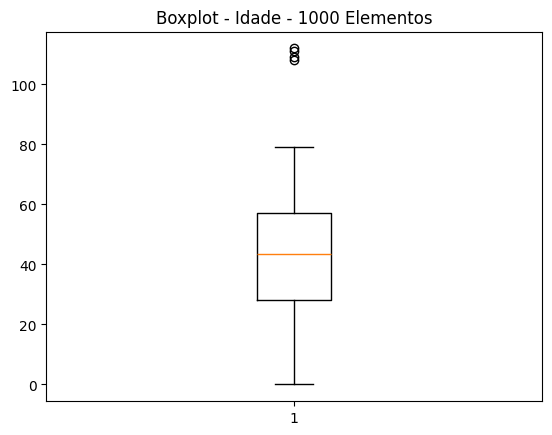

In [18]:
#Geração Gráfico - Idade - 1000 linhas
plt.boxplot(df1000['idade'])
plt.title("Boxplot - Idade - 1000 Elementos")
plt.show()

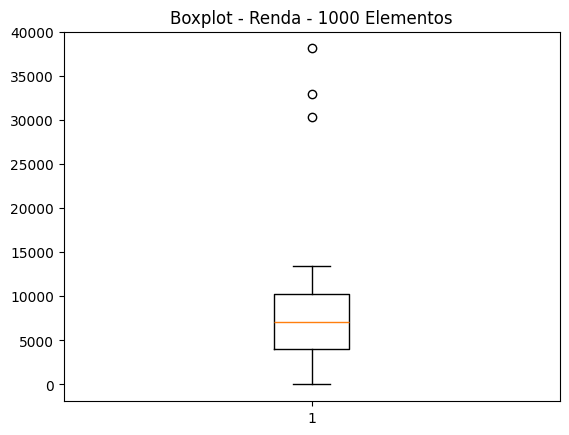

In [19]:
#Geração Gráfico - Renda - 1000 linhas
plt.boxplot(df1000['renda'])
plt.title("Boxplot - Renda - 1000 Elementos")
plt.show()

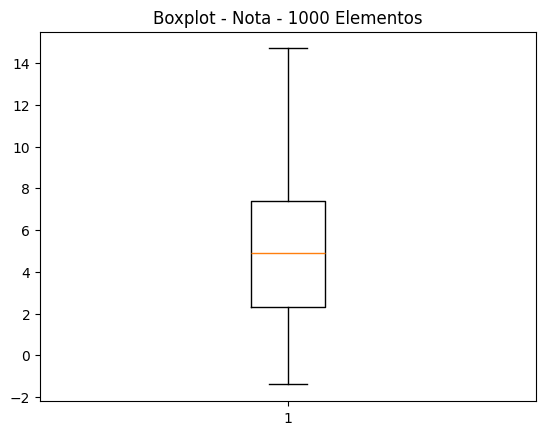

In [20]:
#Geração Gráfico - Nota - 1000 linhas
plt.boxplot(df1000['nota'])
plt.title("Boxplot - Nota - 1000 Elementos")
plt.show()